In [1]:
# Code used to create Figure 5.7 in Ch. 5 of LCA used other categories (bar plot) - recalculating battery OB feedback
# Created 5Sep23 - for thesis VF submission after viva
# Revisited on 5Sep23 to transform y-axis into logscale
# Based on Jupyter notebook: 'Ch5_fig5.7'

# Beware of the csv used as results changed see excel: 'Ch5 LCA Project Jua (19Jun23)'
# I manually ordered the columns to show results columns in descending order

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Move to path where csv is saved
path = "/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua/LCA plots after viva"
# maybe change path after i document it properly

cwd = os.getcwd()
cwd

os.chdir(path)

In [2]:
pwd

'/Users/po416/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhDOct2018/Projects (12Mar20)/LCA/Plots LCA PJua/LCA plots after viva'

In [3]:
# Import results from LCA which are the copied values from tab 'S0_utilisation_rate' in
# excel 'Ch5 LCA Project Jua (6Jun23)' or 9Jun23, columns copied I, and columns P-V.
LCA_oc_used = pd.read_csv("LCA_SCused_order_recalc.csv")
# check type of columns
LCA_oc_used.dtypes

Site_name                 object
County                    object
Institution               object
HT (kg 1,4-DCBeq/kWh)    float64
CC (kg CO2eq/kWh)        float64
MD (kg Fe eq/kWh)        float64
FE (kg 1,4-DCBeq/kWh)    float64
ME (kg 1,4-DCBeq/kWh)    float64
TA (kg SO2eq/kWh)        float64
PMF (kg PM10eq/kWh)      float64
TE (kg 1,4-DCBeq/kWh)    float64
dtype: object

In [4]:
LCA_oc_used.columns

Index(['Site_name', 'County', 'Institution', 'HT (kg 1,4-DCBeq/kWh)',
       'CC (kg CO2eq/kWh)', 'MD (kg Fe eq/kWh)', 'FE (kg 1,4-DCBeq/kWh)',
       'ME (kg 1,4-DCBeq/kWh)', 'TA (kg SO2eq/kWh)', 'PMF (kg PM10eq/kWh)',
       'TE (kg 1,4-DCBeq/kWh)'],
      dtype='object')

In [5]:
LCA_oc_used.head().round(2) # original df is in kg

,Site_name,County,Institution,"HT (kg 1,4-DCBeq/kWh)",CC (kg CO2eq/kWh),MD (kg Fe eq/kWh),"FE (kg 1,4-DCBeq/kWh)","ME (kg 1,4-DCBeq/kWh)",TA (kg SO2eq/kWh),PMF (kg PM10eq/kWh),"TE (kg 1,4-DCBeq/kWh)"
0,AIC_Nadoto_Primary_School,Turkana,School,1.31,0.79,0.54,0.19,0.18,0.01,0.0,0.0
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1.67,1.01,0.69,0.25,0.23,0.01,0.0,0.0
2,A_IC_Gangani_Primary_School,Kwale,School,0.95,0.50,0.40,0.14,0.13,0.00,0.0,0.0
3,Abagarse_Primary_School,Isiolo,School,1.82,1.05,0.76,0.27,0.25,0.01,0.0,0.0
4,Akadeli_Primary_School,Isiolo,School,0.77,0.44,0.32,0.11,0.10,0.00,0.0,0.0


In [6]:
# Change names of columns to convert all units from kg to g
LCA_oc_used_g = LCA_oc_used.rename(columns={"HT (kg 1,4-DCBeq/kWh)": "HT (g1,4-DCBeq/kWh)",\
                                            "CC (kg CO2eq/kWh)": "CC (gCO2eq/kWh)",\
                                            "MD (kg Fe eq/kWh)": "MD (gFeeq/kWh)",\
                                            "FE (kg 1,4-DCBeq/kWh)": "FE (g1,4-DCBeq/kWh)",\
                                            "ME (kg 1,4-DCBeq/kWh)": "ME (g1,4-DCBeq/kWh)",\
                                            "TA (kg SO2eq/kWh)": "TA (gSO2eq/kWh)",\
                                            "PMF (kg PM10eq/kWh)": "PMF (gPM10eq/kWh)",\
                                            "TE (kg 1,4-DCBeq/kWh)": "TE (g1,4-DCBeq/kWh)"})

In [7]:
# Check that columns name change (to grams) in new df created
LCA_oc_used_g.columns

Index(['Site_name', 'County', 'Institution', 'HT (g1,4-DCBeq/kWh)',
       'CC (gCO2eq/kWh)', 'MD (gFeeq/kWh)', 'FE (g1,4-DCBeq/kWh)',
       'ME (g1,4-DCBeq/kWh)', 'TA (gSO2eq/kWh)', 'PMF (gPM10eq/kWh)',
       'TE (g1,4-DCBeq/kWh)'],
      dtype='object')

In [8]:
# Multiply all columns of type "float64" by 1000 to convert values in df to grams (from kg to g)
LCA_oc_used_g[LCA_oc_used_g.select_dtypes(include=['float64']).columns] *= 1000

In [9]:
LCA_oc_used_g.head().round(2) # now it should be in g

,Site_name,County,Institution,"HT (g1,4-DCBeq/kWh)",CC (gCO2eq/kWh),MD (gFeeq/kWh),"FE (g1,4-DCBeq/kWh)","ME (g1,4-DCBeq/kWh)",TA (gSO2eq/kWh),PMF (gPM10eq/kWh),"TE (g1,4-DCBeq/kWh)"
0,AIC_Nadoto_Primary_School,Turkana,School,1306.33,786.24,541.70,193.90,176.96,6.39,2.72,1.03
1,AIC_Nayanaekaton_Primary_School,Turkana,School,1670.54,1005.46,692.73,247.96,226.30,8.17,3.48,1.32
2,A_IC_Gangani_Primary_School,Kwale,School,954.11,501.69,399.55,143.74,131.06,4.45,1.88,0.74
3,Abagarse_Primary_School,Isiolo,School,1824.92,1050.89,759.30,272.26,248.40,8.78,3.73,1.44
4,Akadeli_Primary_School,Isiolo,School,767.98,442.25,319.54,114.58,104.53,3.70,1.57,0.60


In [10]:
# To compare values and check values from kg to g are ok
LCA_oc_used_g.describe().round(2) #this is the new df in grams

,"HT (g1,4-DCBeq/kWh)",CC (gCO2eq/kWh),MD (gFeeq/kWh),"FE (g1,4-DCBeq/kWh)","ME (g1,4-DCBeq/kWh)",TA (gSO2eq/kWh),PMF (gPM10eq/kWh),"TE (g1,4-DCBeq/kWh)"
count,166.00,166.00,166.00,166.00,166.00,166.00,166.00,166.00
mean,1085.09,600.37,452.42,162.51,148.26,5.13,2.18,0.87
std,651.52,364.87,271.81,97.58,89.00,3.10,1.31,0.51
min,269.06,141.48,112.67,40.54,36.96,1.25,0.53,0.21
25%,668.59,367.78,279.44,100.44,91.81,3.13,1.32,0.54
50%,908.57,504.68,378.05,135.82,123.84,4.29,1.81,0.72
75%,1341.97,767.14,561.67,202.01,184.20,6.37,2.71,1.08
max,5031.22,2897.26,2093.35,750.62,684.81,24.21,10.28,3.96


In [13]:
LCA_oc_used.describe().round(6)  # this is the original df in kgs

,"HT (kg 1,4-DCBeq/kWh)",CC (kg CO2eq/kWh),MD (kg Fe eq/kWh),"FE (kg 1,4-DCBeq/kWh)","ME (kg 1,4-DCBeq/kWh)",TA (kg SO2eq/kWh),PMF (kg PM10eq/kWh),"TE (kg 1,4-DCBeq/kWh)"
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,1.085090,0.600367,0.452420,0.162515,0.148260,0.005134,0.002177,0.000866
std,0.651519,0.364870,0.271813,0.097581,0.088997,0.003103,0.001314,0.000511
min,0.269063,0.141478,0.112674,0.040536,0.036959,0.001255,0.000529,0.000210
25%,0.668588,0.367780,0.279439,0.100438,0.091810,0.003133,0.001321,0.000539
50%,0.908566,0.504680,0.378049,0.135820,0.123841,0.004286,0.001813,0.000724
75%,1.341969,0.767141,0.561668,0.202014,0.184197,0.006369,0.002709,0.001081
max,5.031219,2.897257,2.093353,0.750621,0.684815,0.024207,0.010277,0.003959


In [14]:
# Now plot it!
import seaborn as sns
# Set style in Seaborn to plot
sns.set(rc={"figure.dpi":300})
sns.set_context("paper")  # change to notebook maybe? That is how it was in Chapter 4 first draft version 
sns.set_style("ticks")

[Text(0, 0, 'HT (kg 1,4-DCBeq/kWh)'),
 Text(1, 0, 'CC (kg CO2eq/kWh)'),
 Text(2, 0, 'MD (kg Fe eq/kWh)'),
 Text(3, 0, 'FE (kg 1,4-DCBeq/kWh)'),
 Text(4, 0, 'ME (kg 1,4-DCBeq/kWh)'),
 Text(5, 0, 'TA (kg SO2eq/kWh)'),
 Text(6, 0, 'PMF (kg PM10eq/kWh)'),
 Text(7, 0, 'TE (kg 1,4-DCBeq/kWh)')]

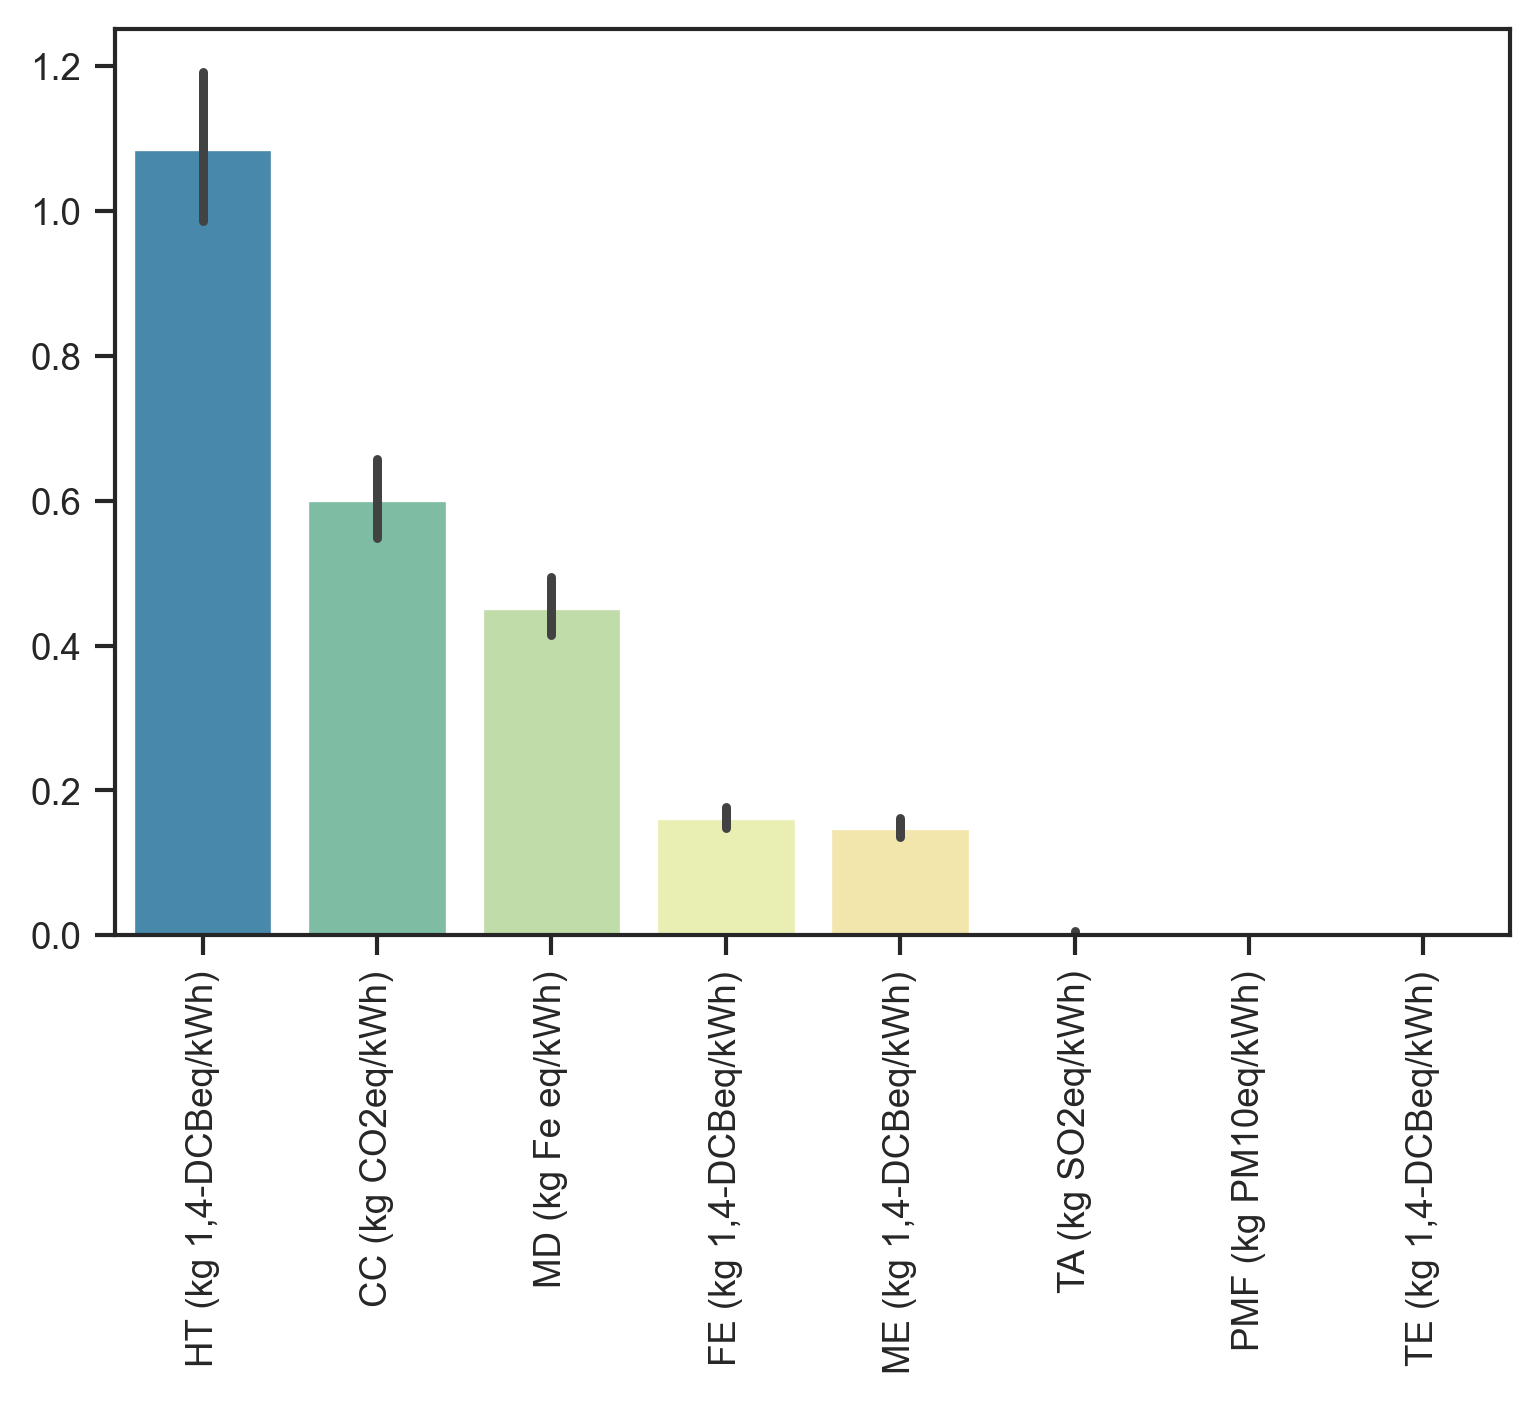

In [15]:
# Plot it for Ch5 after viva battery recalculation Sep23 (but now ordered)
ax=sns.barplot(data=LCA_oc_used, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

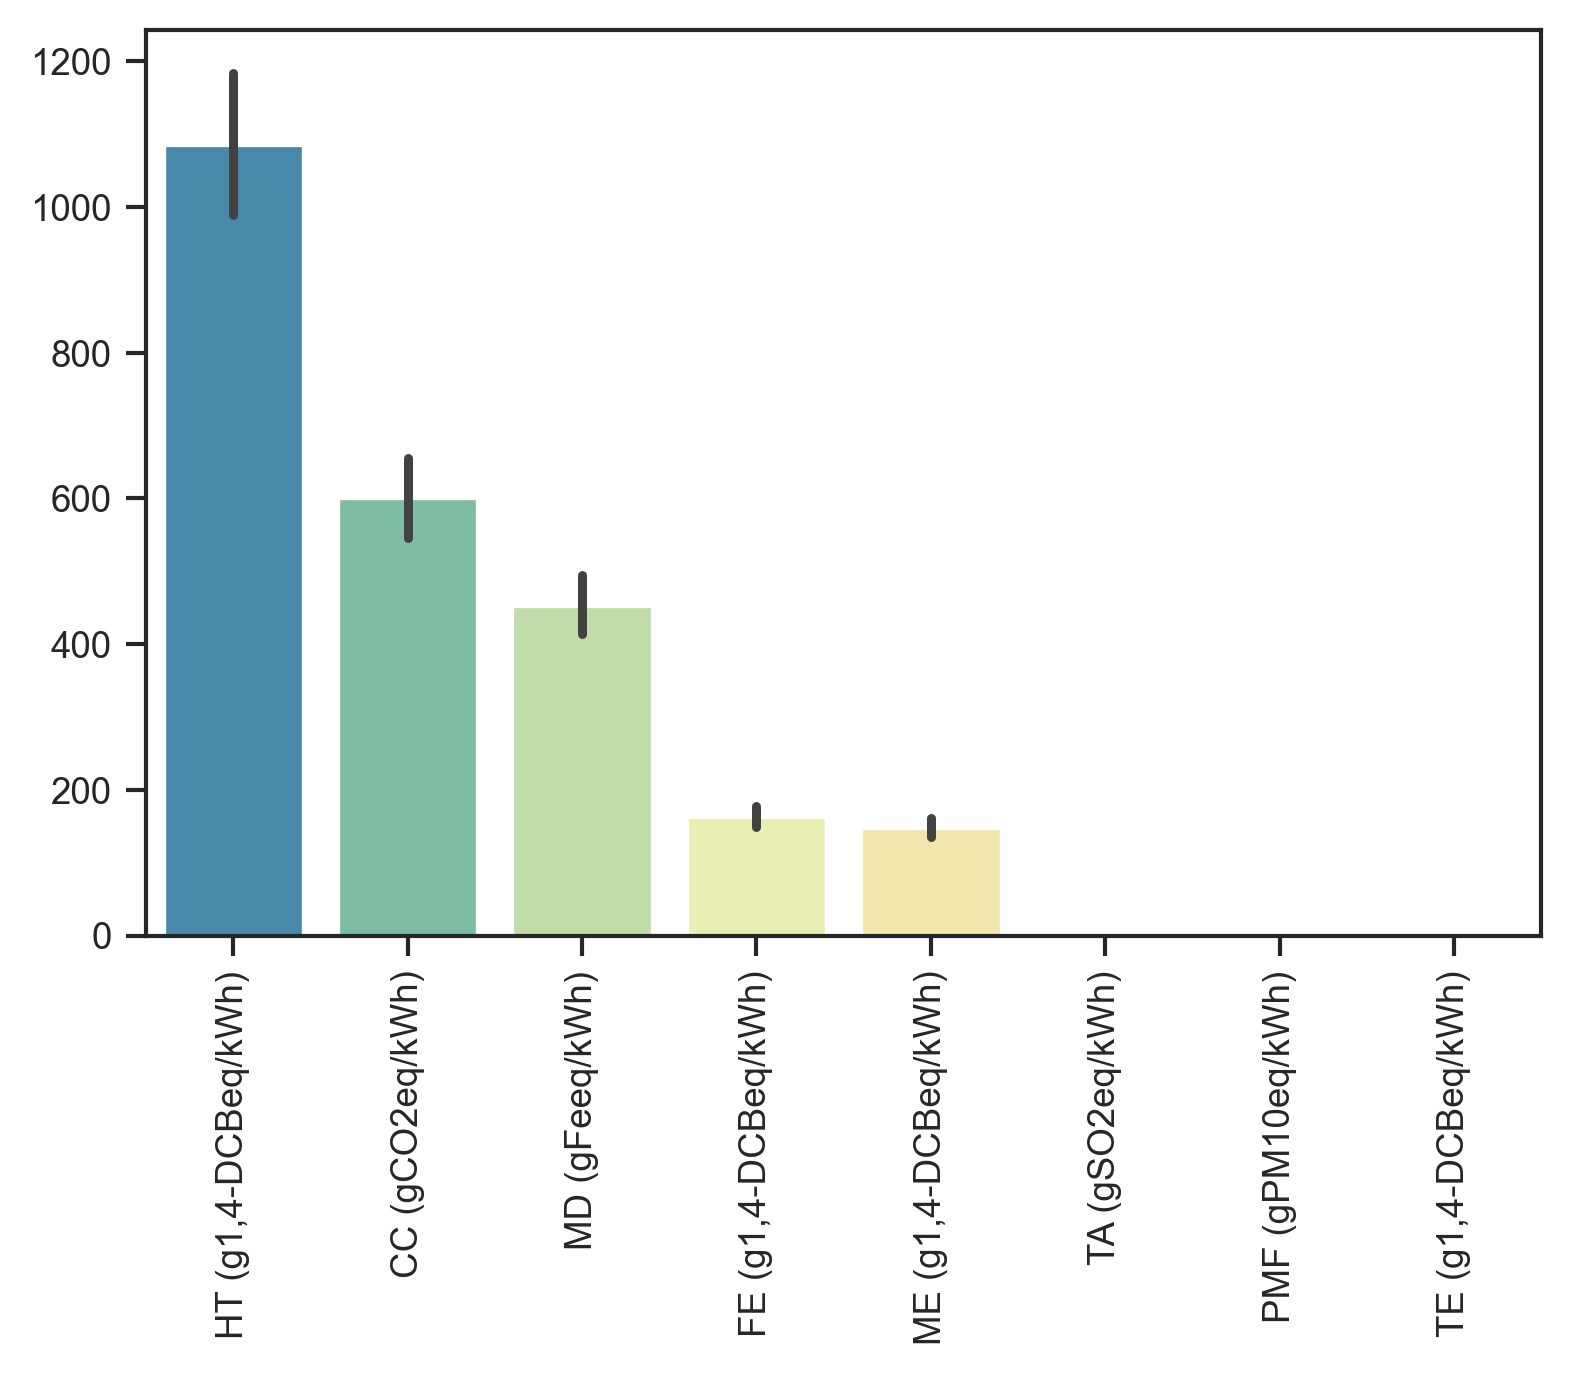

In [16]:
# Plot it for Ch5 VF - after viva battery recalculation
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#plt.savefig("Fig_5.7_recalc.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

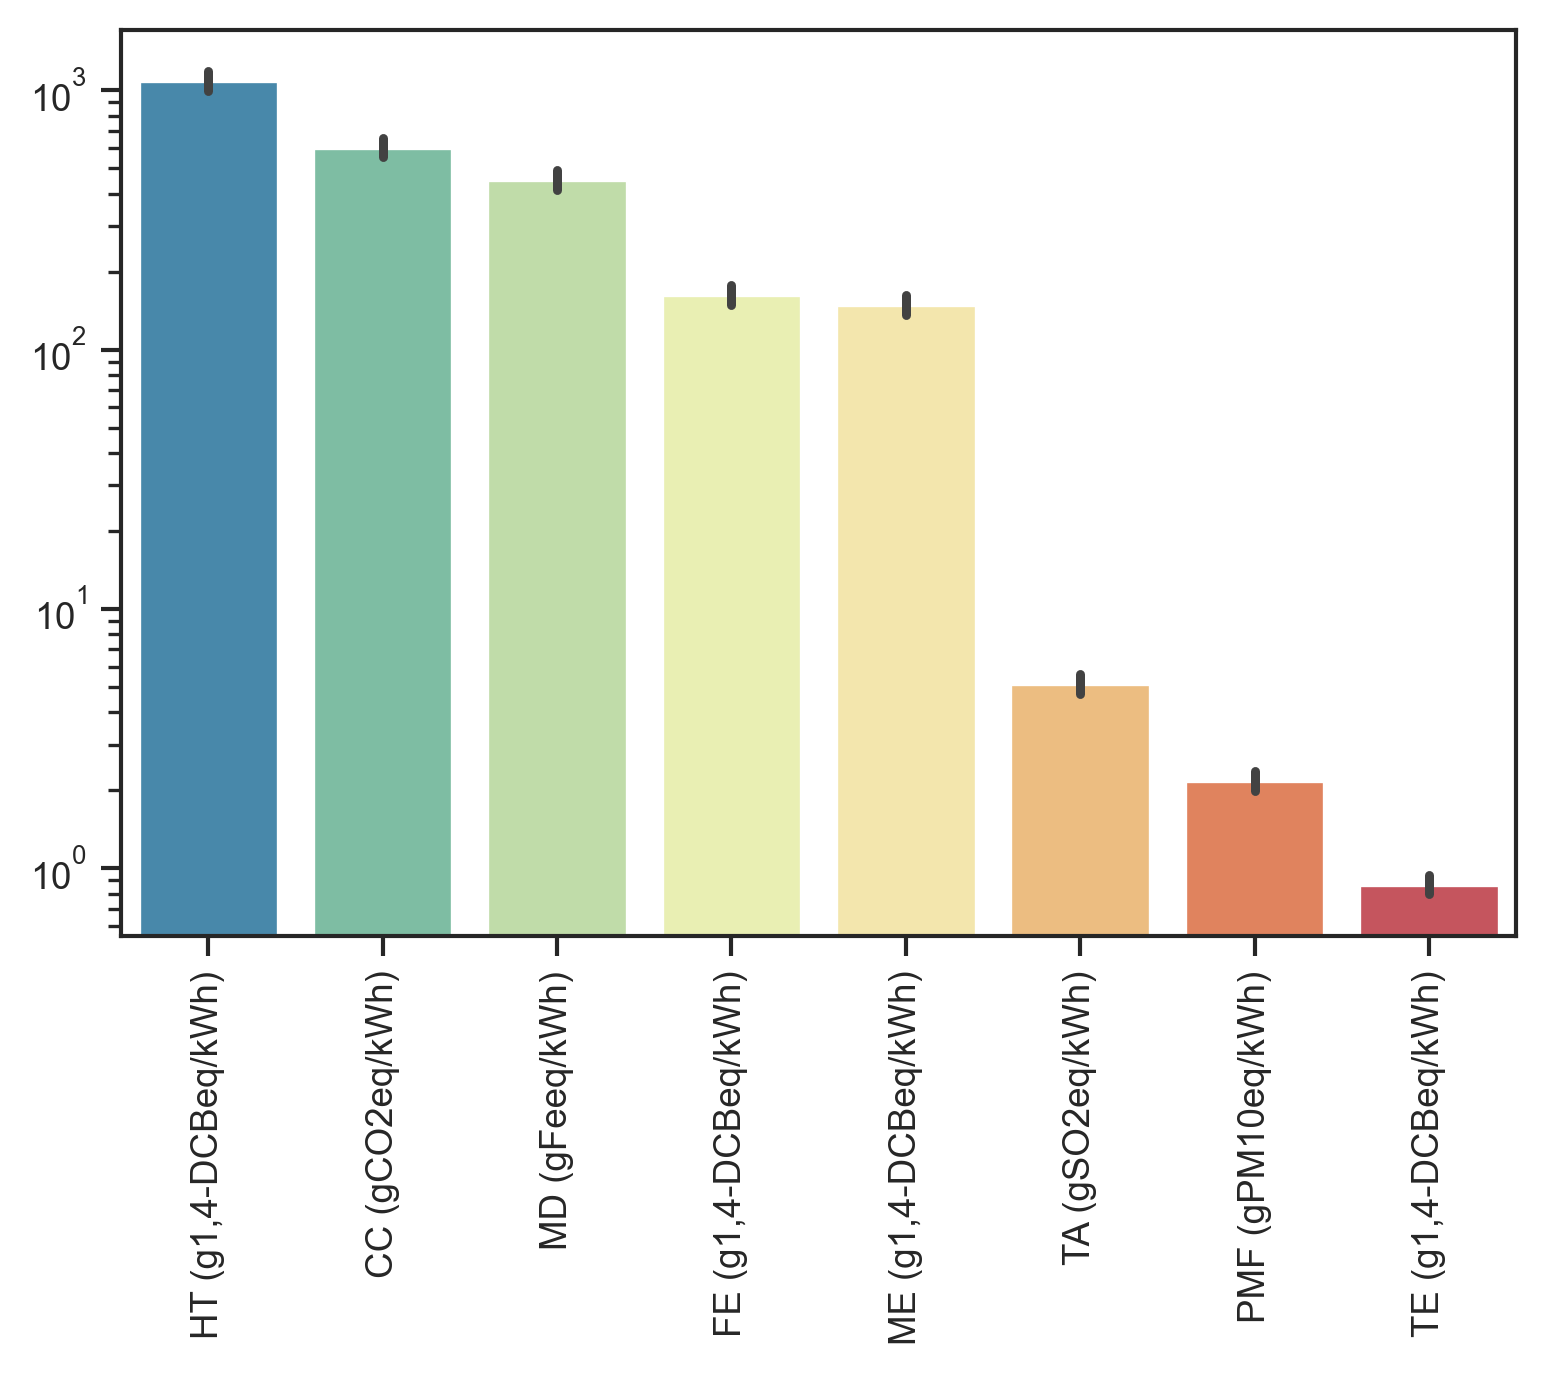

In [17]:
# If I rerun this code in the future, change the PDF figure name to keep previous copy (adding date maybe)
# I moved this manually to the folder "PhD thesis images submission"

# Check that the values considered are ok but they should be as csv is from LCA with everything (until transport)
# so scenario C

# Here I changed y-axis to log scale as it was suggested during the viva. This is with battery calculation of 2.1 kWh
# so how it was in thesis submission in July


ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.yscale("log")

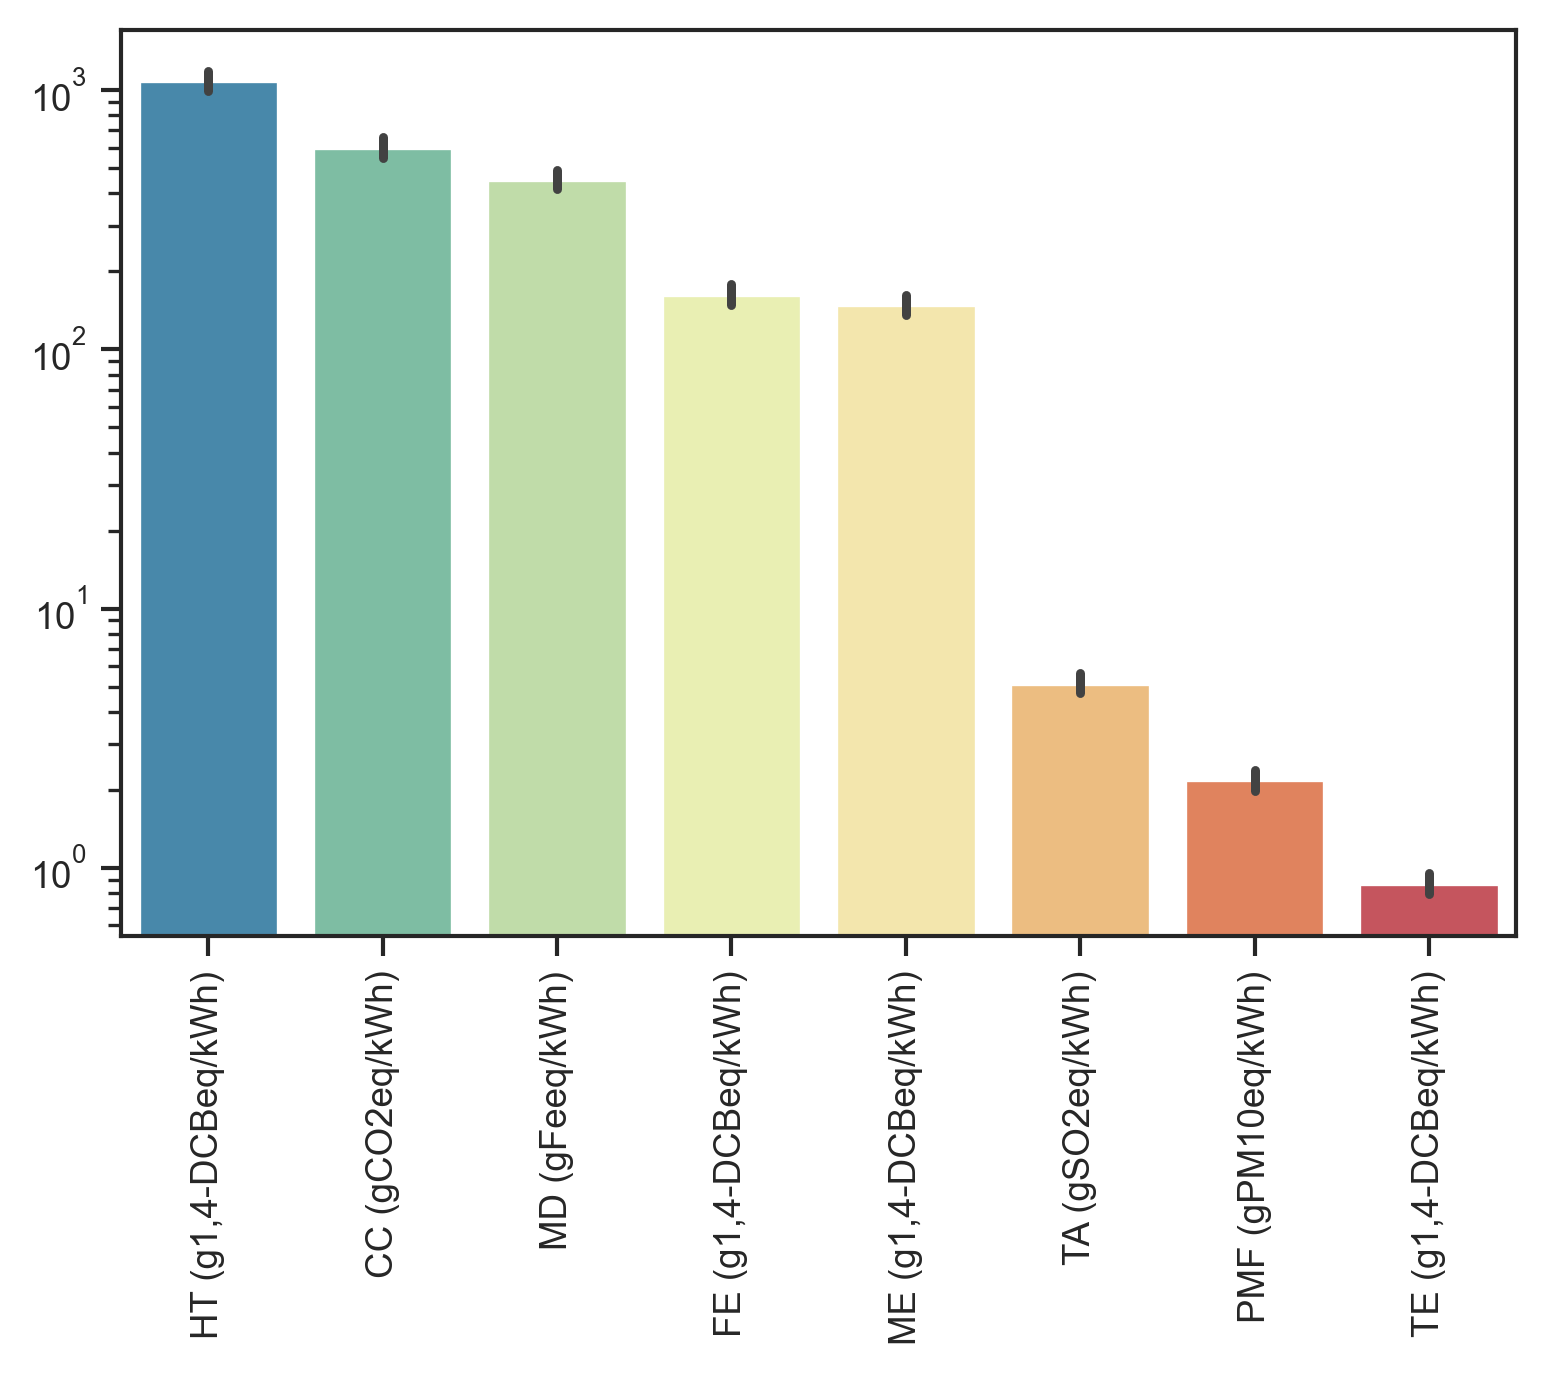

In [18]:
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yscale("log")
#plt.savefig("Fig_5.7_recalc_log.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

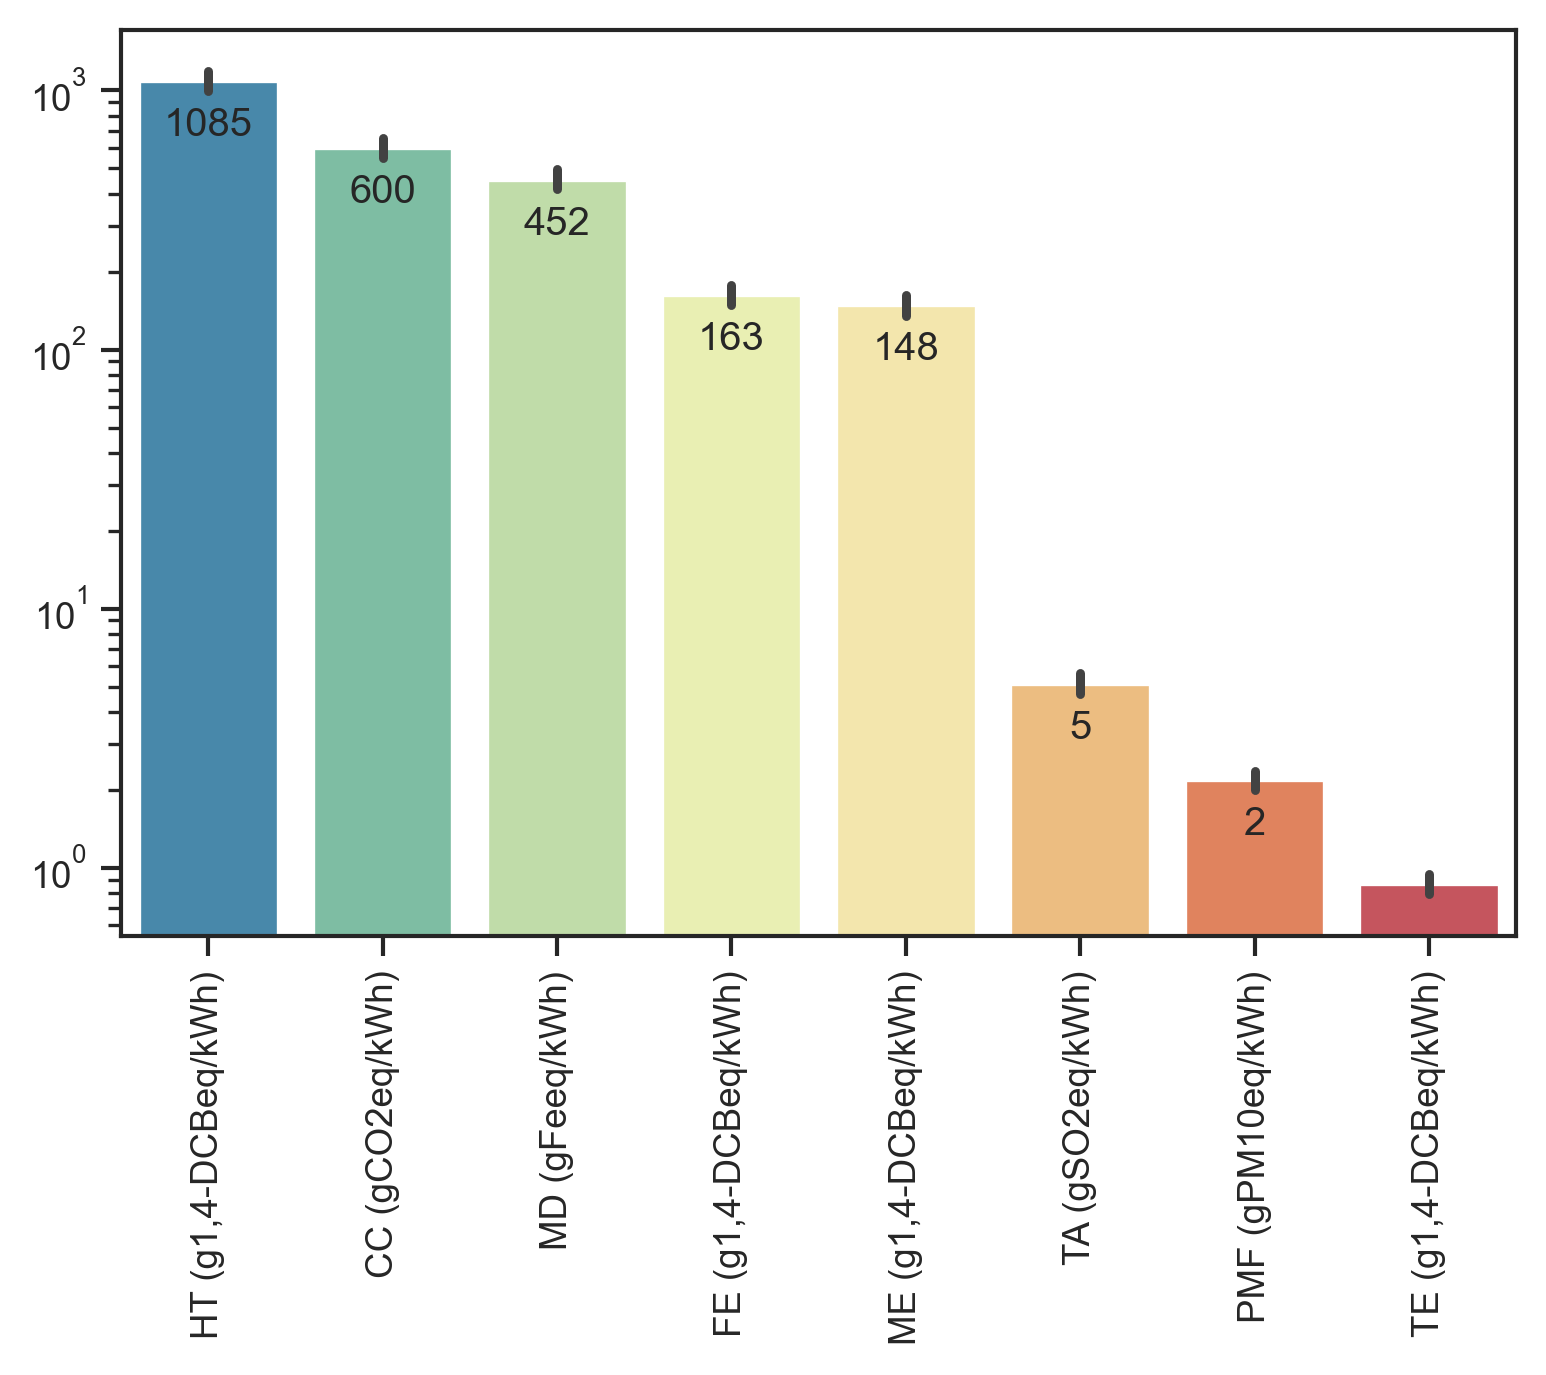

In [19]:
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yscale("log")
for i in ax.containers:
    ax.bar_label(i,fmt="%.0f", label_type="center", padding=8)
plt.savefig("Fig_5.7_recalc_log_label.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

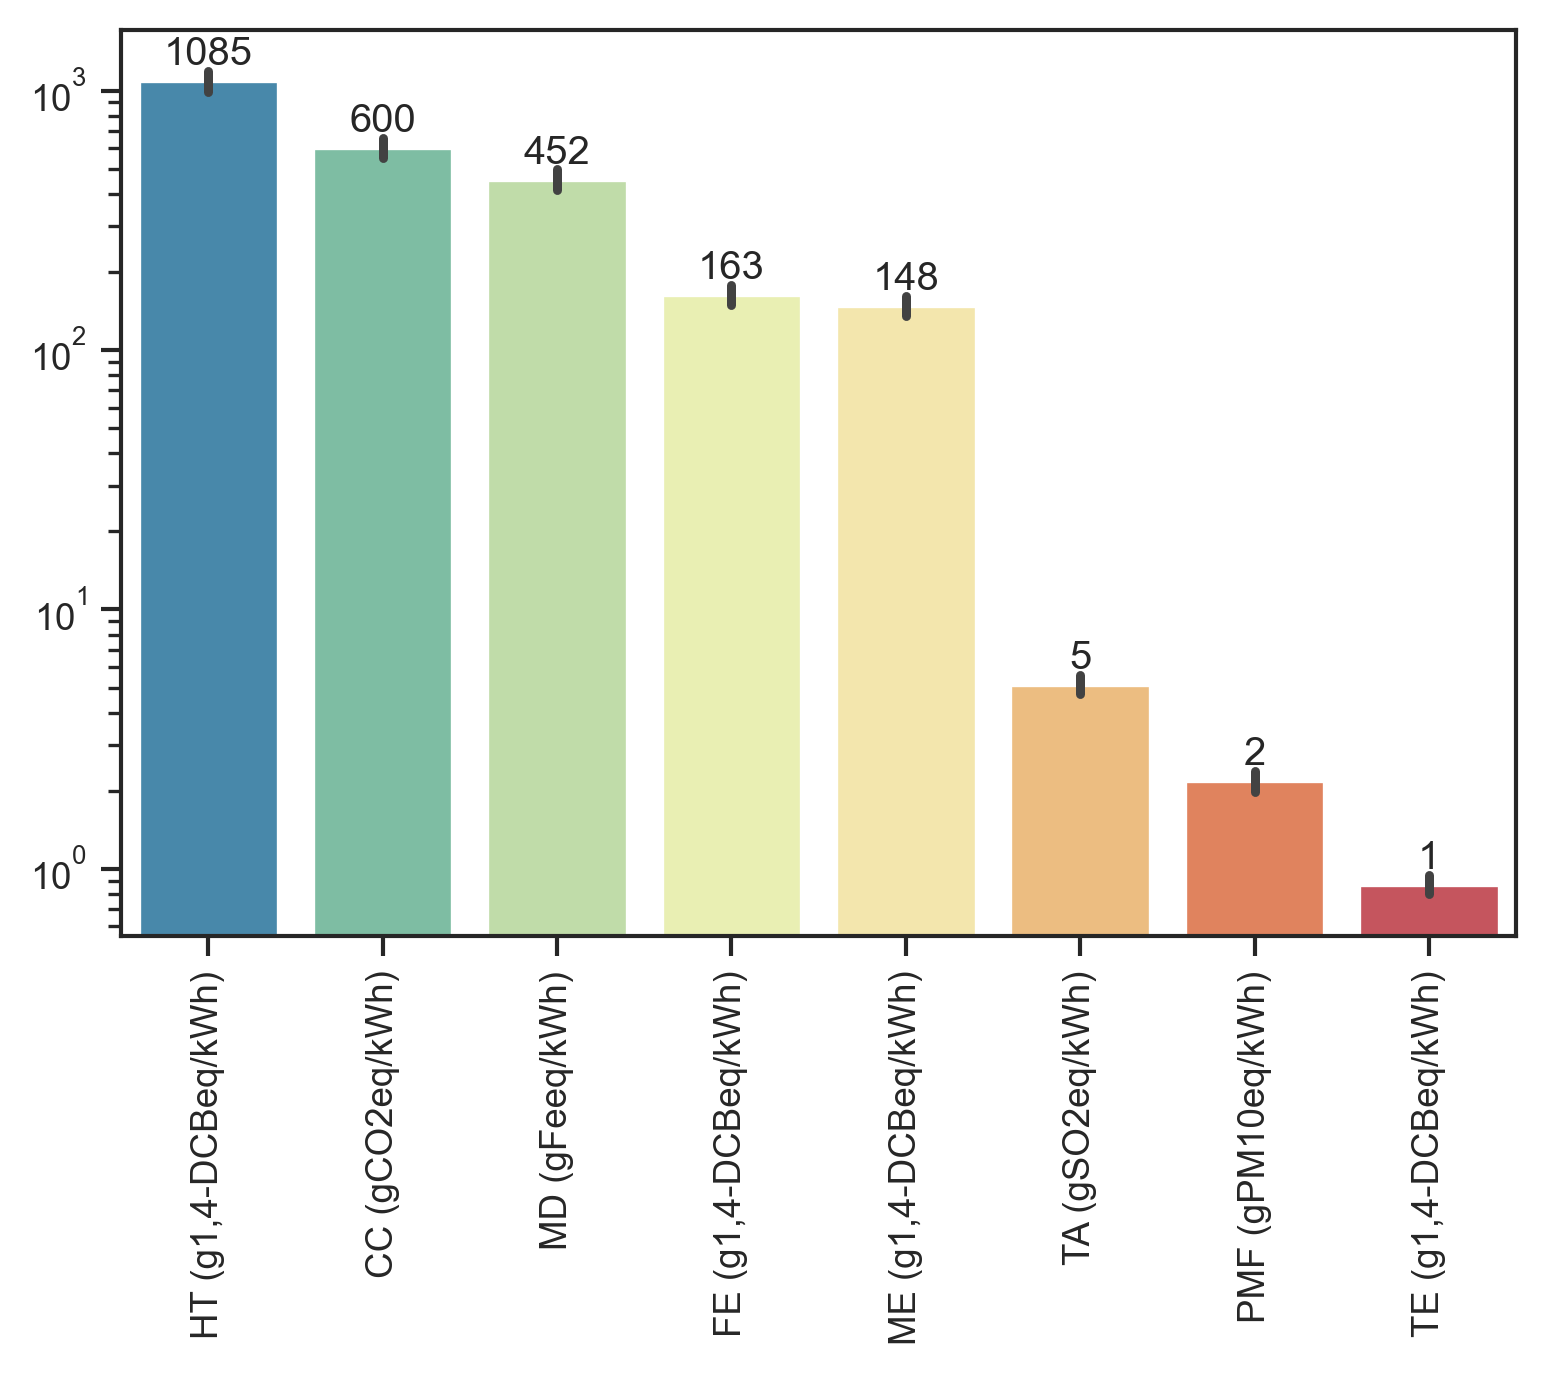

In [20]:
ax=sns.barplot(data=LCA_oc_used_g, palette="Spectral_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yscale("log")
for i in ax.containers:
    ax.bar_label(i,fmt="%.0f", label_type="edge", padding=2)
plt.savefig("Fig_5.7_recalc_log_label2.pdf", dpi=300, bbox_inches="tight")  # change name if need to rerun
plt.show()

In [ ]:
# useful link: https://stackoverflow.com/questions/45439833/how-to-log-scale-in-seaborn
# https://www.geeksforgeeks.org/how-to-show-values-on-seaborn-barplot/